## Визуализация торгов за день
- по реальным записям из базы
- тестовые торговые алгоритмы

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
from dotenv import load_dotenv

load_dotenv()

TOKEN = os.getenv("INVEST_TOKEN")

TICKER = 'RNFT'
FIGI = 'BBG00F9XX7H4'

День: 2024-03-15, 'тестовый', Итог: 1.8, Записей: 12
{'balance': 1.8, 'balance_change_avg': 1.8, 'days': 1, 'success_days': 1, 'success_p': 1.0, 'profit_steps': 5, 'candles_count': 4, 'sleep_trading': 60, 'take_profit_percent': 1.5, 'quit_on_balance_up_percent': 2, 'quit_on_balance_down_percent': 1, 'operations_cnt': 12, 'operations_avg': 12.0, 'op_not_closed': 0, 'op_not_closed_avg': 0.0}


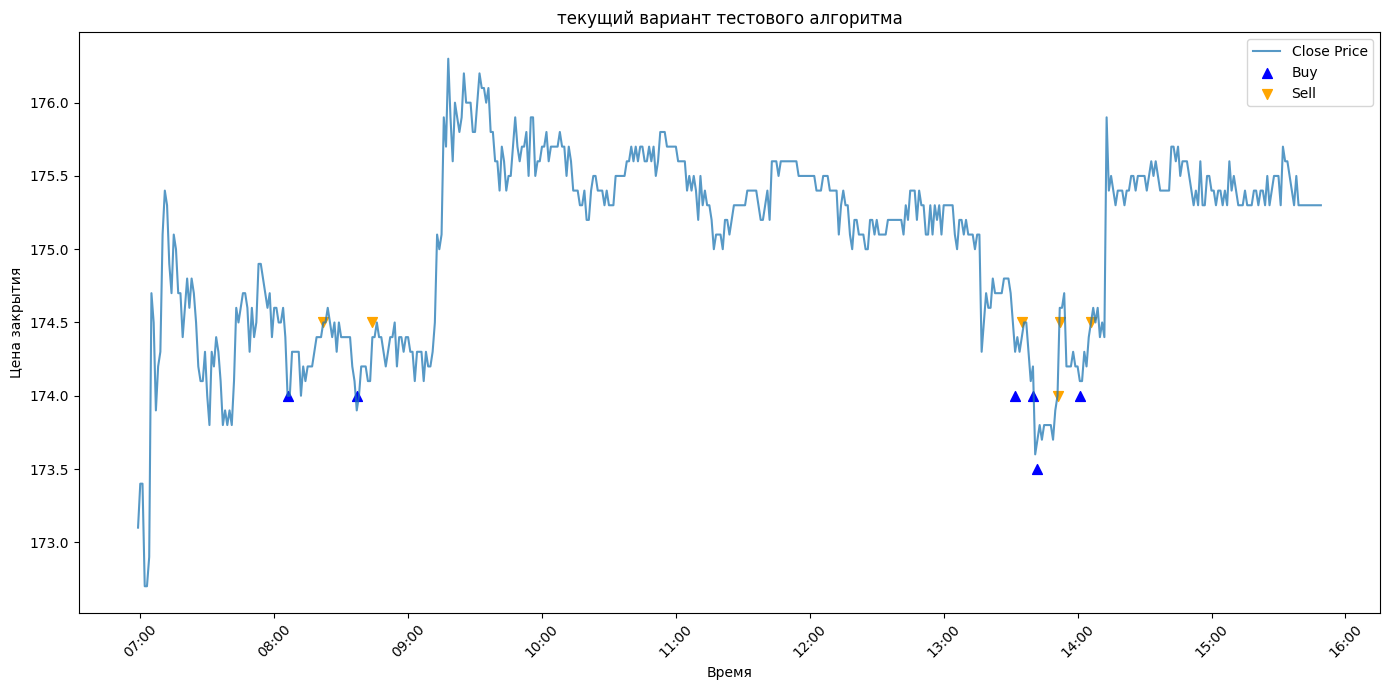

In [32]:
from datetime import datetime
from lib.visaualize import Visualize
from lib.historical_candles import HistoricalCandles
from lib.historical_trade import HistoricalTrade
from test_env.test_alg import TestAlgorithm

historical_trade = HistoricalTrade()
data_handler = HistoricalCandles(TOKEN, FIGI, TICKER)

date = '2024-03-15'
# date = None # '2024-03-21'
alg_name = '-' #'v5_t60'

viz = Visualize(data_handler)

def show_test_alg(date_):
    if date_ is None:
        date_ = datetime.now().strftime('%Y-%m-%d')
    
    test_alg = TestAlgorithm(TOKEN, TICKER, FIGI, do_printing=False)
    
    result = test_alg.test(
        last_test_date = date_,
        test_days_num = 1, # тут берем всегда только 1 день для этого файла
    
        profit_steps=5, 
        candles_count=4, 
        
        take_profit_percent=1.5,
    
        sleep_trading=1 * 60, 
        sleep_no_trade=300, 
        no_operation_timeout_seconds=300,
    )
    
    print(f"День: {date_}, 'тестовый', Итог: {result['balance']}, Записей: {result['operations_cnt']}")
    print(result)
    
    viz.draw(
        date_, 
        test_alg.accounting_helper.get_deals(),
        'текущий вариант тестового алгоритма'
    )

results = historical_trade.get_daily_totals(date, alg_name)

for obj in results:
    print(f"День: {obj.date}, {obj.alg_name}, "
          f"{'Итог' if obj.is_closed else 'Подытог'}: {obj.total}, "
          f"Записей: {obj.cnt}")
    viz.draw(
        obj.date, 
        historical_trade.get_deals(obj.date, obj.alg_name), 
        obj.alg_name
    )
        
show_test_alg(date)